<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project2 Predictive Modelling:Home Sale Price of Ames, IA

### Part 3 Model, Predict & Evaluate

## Contents:
- [Data Import and Classification of Variables](#Data-Import-and-Classification-of-Variables)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Preprocessing & Feature Engineering](#Preprocessing-&-Feature-Engineering)
- [Model, Predict & Evaluate](#Model,-Predict-&-Evaluate)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

#### Import Data

In [1]:
#Import libtaries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV,Lasso, ElasticNetCV,Ridge,ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Read in data from train Dataframe
train=pd.read_csv('datasets/train_featured.csv')
train.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,...,electrical_Mix,electrical_SBrkr,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,60,0.0,13517,6,8,289.0,4,3,3,3,...,0,1,0,0,0,0,0,0,0,1
1,60,43.0,11492,7,5,132.0,4,3,4,3,...,0,1,0,0,0,0,0,0,0,1
2,20,68.0,7922,5,7,0.0,3,4,3,3,...,0,1,0,0,0,0,0,0,0,1
3,60,73.0,9802,5,5,0.0,3,3,4,3,...,0,1,0,0,0,0,0,0,0,1
4,50,82.0,14235,6,8,0.0,3,3,2,4,...,0,1,0,0,0,0,0,0,0,1


In [3]:
# Read in data from test Dataframe
kaggle_test=pd.read_csv('datasets/kaggle_test_featured.csv')
kaggle_test.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,...,electrical_Mix,electrical_SBrkr,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,190,69.0,9142,6,8,0.0,3,2,2,3,...,0,0,0,0,0,0,0,0,0,1
1,90,0.0,9662,5,4,0.0,3,3,4,3,...,0,1,0,0,0,0,0,0,0,1
2,60,58.0,17104,7,5,0.0,4,3,4,4,...,0,1,0,0,0,0,0,1,0,0
3,30,60.0,8520,5,6,0.0,4,3,3,3,...,0,1,0,0,0,0,0,0,0,1
4,20,0.0,9500,6,5,247.0,3,3,4,3,...,0,1,0,0,0,0,0,0,0,1


In [4]:
print(train.shape,kaggle_test.shape) #Check train and test dataframe shape

(2046, 192) (879, 191)


## Model, Predict & Evaluate
### Model pre-scaling

In [5]:
#Base Model
features = [x for x in train.columns if x != 'saleprice']
X=train[features]
y=train['saleprice']


#### Creating train/test splits, scaling

In [6]:
#Creating train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42,
                                                    test_size=0.1)

In [7]:
# Scaling the data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

### Linear Regression
For each model, the model.score method returns the $R^2$/coefficient of determination for the model - the amount of variance in the data predicted by the model.
### Baseline Model

In [8]:
#Linear Regression
lr= LinearRegression()
lr.fit(X_train_ss, y_train) #Fit the model on the seen data
lr.score(X_train_ss, y_train) #R^2 score of the seen data
lr.score(X_test_ss, y_test) #R^2 score of the validation data
print ("R^2 Score on train data: ", lr.score(X_train_ss, y_train))
print ("R^2 Score on validation data: ", lr.score(X_test_ss, y_test))

R^2 Score on train data:  0.9356948509281929
R^2 Score on validation data:  -1.8232020741818753e+22


In [9]:
lr.score(X_train_ss, y_train),lr.score(X_test_ss, y_test)

(0.9356948509281929, -1.8232020741818753e+22)

R-squared measures the strength of the relationship between the model and the dependent variable on a convenient 0 – 100% scale. Eventhough $R^2$ score is very high for the trained data, we can see that $R^2$ score for the unseen data is very bad.

**Root Mean Squared Error (RMSE)**
The root mean squared error is the square root of the average of the squared errors (i.e. the difference between each prediction and the actual values of home prices).

In [10]:
np.sqrt(mean_squared_error(y_test, lr.predict(X_test_ss))) #RMSE score of baseline

55294755457.642136

RMSE of our baseline model is too high which shows large errors between the predicted values and the actual saleprice

Now that the $R^2$ score of the baseline is seen, we need to optimize the model by introducing Linear Regression with L1 Penalty (LASSO),Linear Regression with L2 Penalty (RIDGE) or Elastic Net.

### Regularized models
Regularization techniques are used to deal with overfitting and when the dataset is large.

**Linear Regression with L1 Penalty (LASSO)**
The L1 penalty can be used for feature selection as it 'zeroes out' uninformative coefficients, effectively reducing the overall feature space and retaining only strongly informative variables. 


**Linear Regresssion w/ L2 Penalty (Ridge)**
Introducing L2 penalty distributes error across the coefficients, minimizing coefficients for uninformative variables (but not reducing those coefficients to 0) while retaining higher coefficients for informative variables.

**Elastic Net**
Elastic Net combines both L1 and L2 regularization

#### Optimizing Hyperparameters and checking Cross Validation Score


In [11]:
#Initializing the models
lasso = LassoCV(n_alphas=200)
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
enet = ElasticNetCV(l1_ratio=np.linspace(0.001, 1, 50), n_alphas = 100,max_iter=2000)

In [12]:
# Cross Validation Score of the baseline model
lr_scores = cross_val_score(lr, X_train_ss, y_train, cv=5)
print("Cross Validation Score Linear Regression: ",lr_scores.mean())

Cross Validation Score Linear Regression:  -2.5203506982937445e+25


We can see that the baseline Linear regression performs very poorly; the high negative $R^2$ value for our test data means that our baseline linear regression model is predicting price in a way that differs from the data. This is corroborated by the very high RMSE.

In [13]:
# Cross Validation Score of the lasso model
lasso_scores = cross_val_score(lasso, X_train_ss, y_train, cv=5)
print("Cross Validation Score Lasso: ",lasso_scores.mean())

Cross Validation Score Lasso:  0.9096769262269072


In [14]:
# Cross Validation Score of the ridge model
ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)
print("Cross Validation Score Ridge: ",ridge_scores.mean())

Cross Validation Score Ridge:  0.9023086136771955


In [15]:
# Cross Validation Score of the Elastic Net model
enet_scores = cross_val_score(enet, X_train_ss, y_train, cv=5)
print("Cross Validation Score Elastic Net: ",enet_scores.mean())

Cross Validation Score Elastic Net:  0.9099928793434406


## Model Fitting and Evaluation

We can see that both **Lasso** and **Elastic Net** seems to be doing ggod, so let's move forward with and evaluate both the models. Models are fit to the training data, and the training and test $R^2$ scores are evaluated.

In [16]:
# Find missing columns in test
missing_cols = set(X_train.columns) - set(kaggle_test.columns)
missing_cols

set()

In [17]:
kaggle_test_ss = ss.transform(kaggle_test) # Scale final test data

## Linear Regression with L1 Penalty (LASSO

In [18]:
lasso.fit(X_train_ss, y_train) #Fit the model to the seen data

LassoCV(n_alphas=200)

In [19]:
r2_lasso_train=lasso.score(X_train_ss, y_train) #R^2 score on the seen data
print ("R^2 Score on train data: ", r2_lasso_train)
r2_lasso_val=lasso.score(X_test_ss, y_test) #R2 score on the validation data
print ("R^2 Score on validation data: ", r2_lasso_val)

R^2 Score on train data:  0.9237137386007027
R^2 Score on validation data:  0.9349570073013724


In [20]:
predictions_lasso = lasso.predict(X_test_ss) #Predict saleprice on with test data.
rmse_lasso = (mean_squared_error(y_test, predictions_lasso))**0.5 #Check the RMSE
print ("RMSE Score: ", rmse_lasso)

RMSE Score:  0.10443998392381035


In [21]:
lasso.alpha_

0.0028126266578804406

##### Plot of Actual vs Predicted Home Price using Lasso

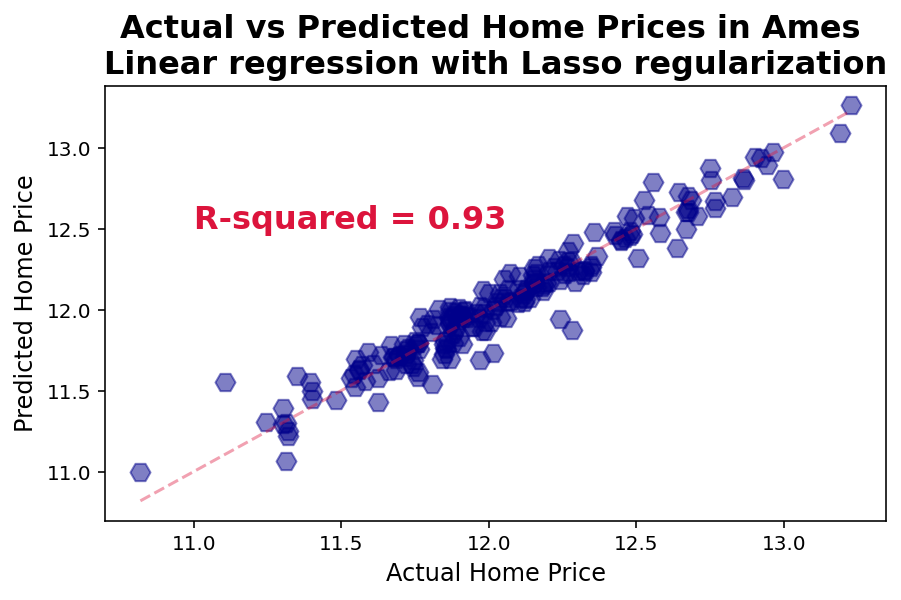

In [22]:
#Plot of Actual vs Predicted Home Price using Lasso
fig, ax = plt.subplots(figsize = (7,4))
#scatter plot of y_test vs predictions
ax.scatter(y_test, predictions_lasso, color ='darkblue', 
           alpha = 0.5, marker = 'H',s=100)
ax.set_xlabel('Actual Home Price', size = 12)
ax.set_ylabel('Predicted Home Price', size = 12)
ax.set_title('Actual vs Predicted Home Prices in Ames \nLinear regression with Lasso regularization', 
             size = 16,
             weight = 'bold')
ax.plot([y_test.min(), y_test.max()], 
        [y_test.min(), y_test.max()],'--',
        color = 'crimson',alpha=0.4);
ax.text(11, 12.5, 'R-squared = %0.2f' % r2_lasso_val, 
        color = 'crimson', fontsize = 16, weight = 'bold')
plt.show()

##### Residual Plot of Lasso

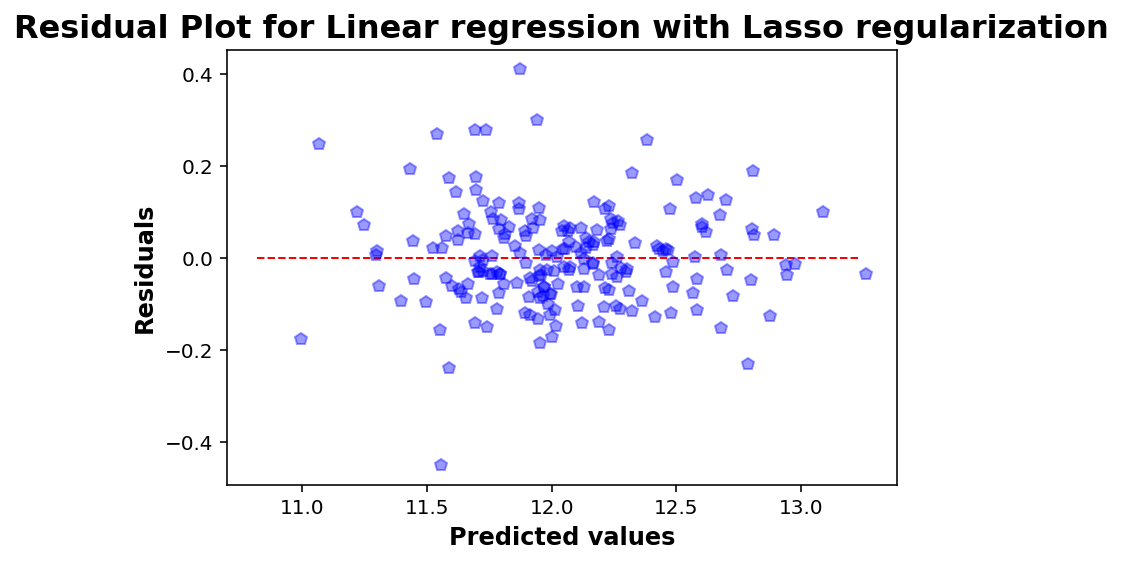

In [23]:
#Residual Plot of Lasso
residual_lasso=y_test - predictions_lasso
fig, ax = plt.subplots()
#Plot residuals
ax.plot(predictions_lasso, residual_lasso, 'p', alpha=0.4, 
        color = 'blue'); 
ax.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), 
          color='red', linestyle = '--', linewidth = 1.0)
ax.set_title('Residual Plot for Linear regression with Lasso regularization', 
             size = 16, weight = 'bold');
ax.set_xlabel('Predicted values', size = 12, weight = 'bold');
ax.set_ylabel('Residuals', size = 12, weight = 'bold');

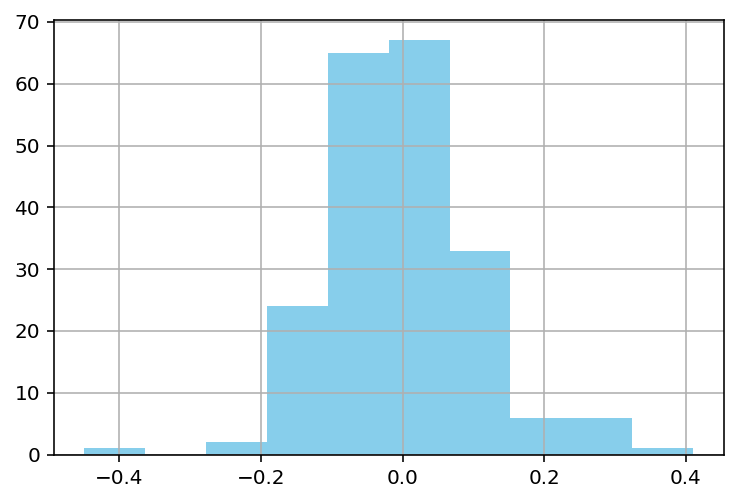

In [24]:
# plotting a histogram to see the distribution of residuals from lasso model
residual_lasso.hist(color= 'skyblue');

#### Coefficients in the LASSO Model

Coefficients indicates the features that 
The lasso coefficients become zero in a certain range and are reduced by a constant factor, which explains the low magnitude in comparison to ridge.

In [25]:
#Display top 20 lasso coefficients and their variables 
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,variable,coef,abs_coef
39,total_sf,0.140292,0.140292
3,overall_qual,0.086803,0.086803
4,overall_cond,0.042268,0.042268
40,built_age,-0.041110,0.041110
2,lot_area,0.027008,0.027008
22,functional,0.025190,0.025190
14,bsmt_full_bath,0.019380,0.019380
30,paved_drive,0.018577,0.018577
42,remod/add_age,-0.018442,0.018442
168,bsmtfin_type_1_Unf,-0.017674,0.017674


Lasso picked 96 features and eliminated the other 95 features


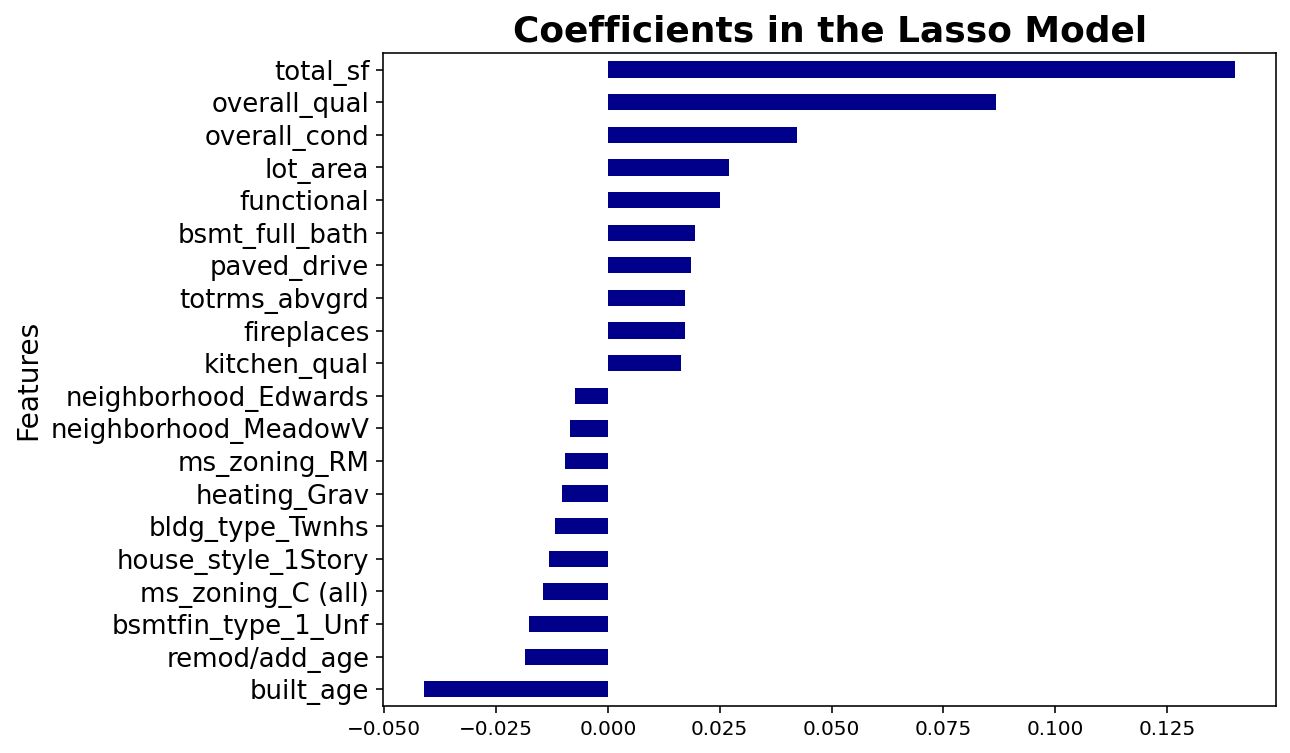

In [26]:
#Plot top 20 lasso coefficients and their variables 
plt.figure(figsize = (8,6))
coefs = pd.Series(lasso.coef_, index = X_train.columns)
#Print number of features picked by Lasso.
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
#Include top +ve and -ve coefficients
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
#Print Bar chart
imp_coefs.plot(kind = "barh", color = 'darkblue')
plt.ylabel('Features', size = 14)

ax = plt.gca()
ax.tick_params(axis = 'y', labelsize = 13)
plt.title("Coefficients in the Lasso Model", size = 18,weight = 'bold')

plt.show()

In [27]:
print ('Percent variables zeroed out:', np.sum((lasso.coef_ == 0))/float(X_train.shape[1]))

Percent variables zeroed out: 0.4973821989528796


#### Predict the Target Value

In [28]:
#Predict the price
results_lasso=lasso.predict(kaggle_test_ss)#Predict the price
results_lasso = np.round(np.exp(results_lasso),4)#Convert from log scale using exponential
results_lasso.mean() #Print mean of predicted price 

179782.758136405

## Elastic Net

In [29]:
enet.fit(X_train_ss, y_train) #Fit Elastic Net to the seen data

ElasticNetCV(l1_ratio=array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487755, 0.22526531, 0.24565306, 0.26604082, 0.28642857,
       0.30681633, 0.32720408, 0.34759184, 0.36797959, 0.38836735,
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.49030612,
       0.51069388, 0.53108163, 0.55146939, 0.57185714, 0.5922449 ,
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ]),
             max_iter=2000)

In [30]:
r2_enet_train=enet.score(X_train_ss, y_train) #R^2 score on the seen data
print ("R^2 Score on train data: ", r2_enet_train)
r2_enet_val=lasso.score(X_test_ss, y_test) #R2 score on the validation data
print ("R^2 Score on validation data: ", r2_enet_val)

R^2 Score on train data:  0.9236508333237714
R^2 Score on validation data:  0.9349570073013724


In [31]:
#r2_enet=enet.score(X_test_ss, y_test) #R^2 score od elastic net on validation data
#print ("R^2 Score on validation data: ", r2_enet)

In [32]:
predictions_enet = enet.predict(X_test_ss)
rmse_enet = (mean_squared_error(y_test, predictions_enet))**0.5 #RMSE of Elastic Net
print ("RMSE Score: ", rmse_lasso)

RMSE Score:  0.10443998392381035


In [33]:
enet.alpha_

0.019103153574780506

In [34]:
enet.l1_ratio

array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487755, 0.22526531, 0.24565306, 0.26604082, 0.28642857,
       0.30681633, 0.32720408, 0.34759184, 0.36797959, 0.38836735,
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.49030612,
       0.51069388, 0.53108163, 0.55146939, 0.57185714, 0.5922449 ,
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ])

##### Plot of Actual vs Predicted Home Price using Elastic Net

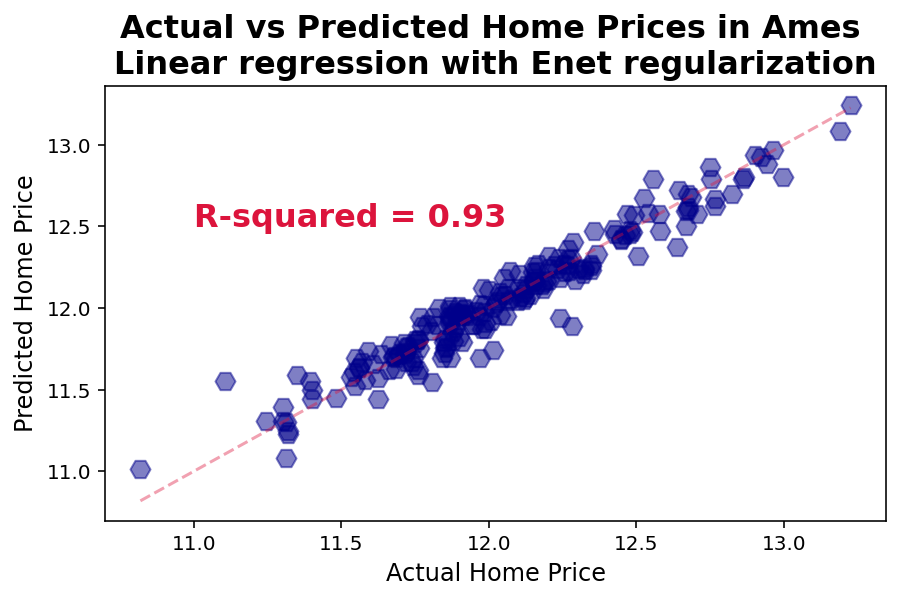

In [35]:
#Plot of Actual vs Predicted Home Price using Elastic Net
fig, ax = plt.subplots(figsize = (7,4))
ax.scatter(y_test, predictions_enet, 
           color ='darkblue', alpha = 0.5, 
           marker = 'H',s=100) #scatter plot of y_test vs predictions
ax.set_xlabel('Actual Home Price', size = 12)
ax.set_ylabel('Predicted Home Price', size = 12)
ax.set_title('Actual vs Predicted Home Prices in Ames \nLinear regression with Enet regularization', 
             size = 16,weight = 'bold')
ax.plot([y_test.min(), y_test.max()], 
        [y_test.min(), y_test.max()],'--', 
        color = 'crimson',alpha=0.4)
ax.text(11, 12.5, 'R-squared = %0.2f' % r2_enet_val, 
        color = 'crimson', fontsize = 16, weight = 'bold')
plt.show()

##### Residual Plot of Elastic Net

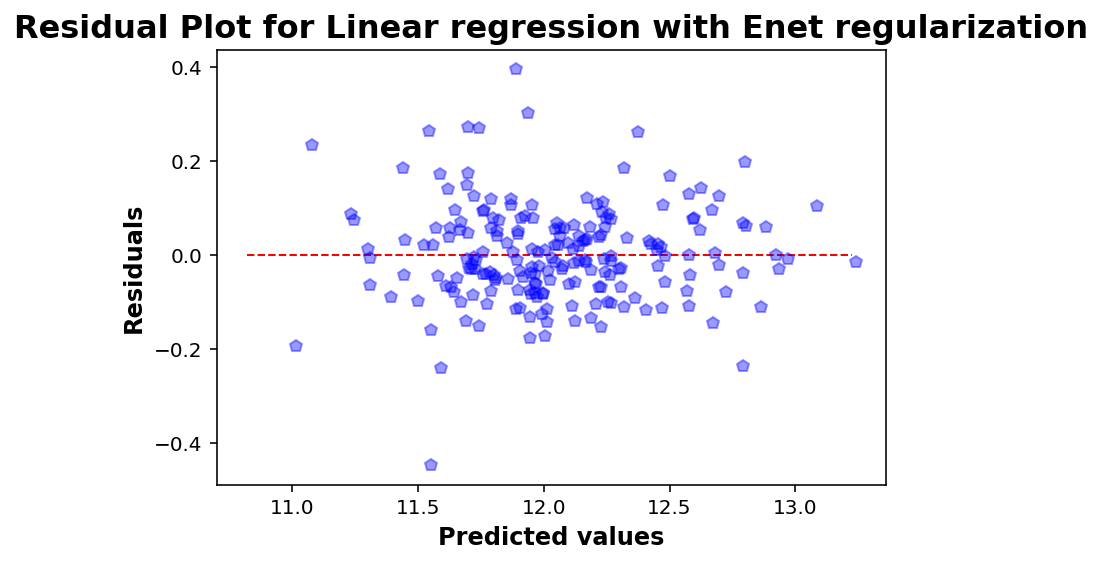

In [36]:
residual_enet=y_test - predictions_enet
fig, ax = plt.subplots()
ax.plot(predictions_enet, 
        residual_enet, 'p', 
        alpha=0.4, color = 'blue'); #Plot residuals
ax.hlines(y=0, xmin=y_test.min(), 
          xmax=y_test.max(), 
          color='red', linestyle = '--', linewidth = 1.0)
ax.set_title('Residual Plot for Linear regression with Enet regularization', 
             size = 16, weight = 'bold');
ax.set_xlabel('Predicted values', size = 12, weight = 'bold');
ax.set_ylabel('Residuals', size = 12, weight = 'bold');

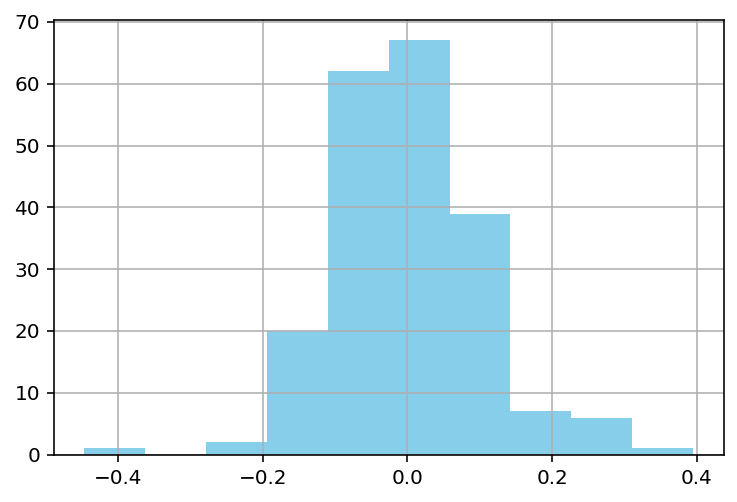

In [37]:
# plotting a histogram to see the distribution of residuals from Enet model
residual_enet.hist(color= 'skyblue');

#### Coefficients in the Elastic Net Model

In [38]:
#Display top 20 Elastic Net coefficients and their variables 
enet_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':enet.coef_,
                            'abs_coef':np.abs(enet.coef_)})

enet_coefs.sort_values('abs_coef', inplace=True, ascending=False)

enet_coefs.head(20)

,variable,coef,abs_coef
39,total_sf,0.130182,0.130182
3,overall_qual,0.084005,0.084005
4,overall_cond,0.040779,0.040779
40,built_age,-0.036482,0.036482
2,lot_area,0.026858,0.026858
22,functional,0.024519,0.024519
21,totrms_abvgrd,0.020793,0.020793
14,bsmt_full_bath,0.019440,0.019440
30,paved_drive,0.019093,0.019093
42,remod/add_age,-0.018390,0.018390


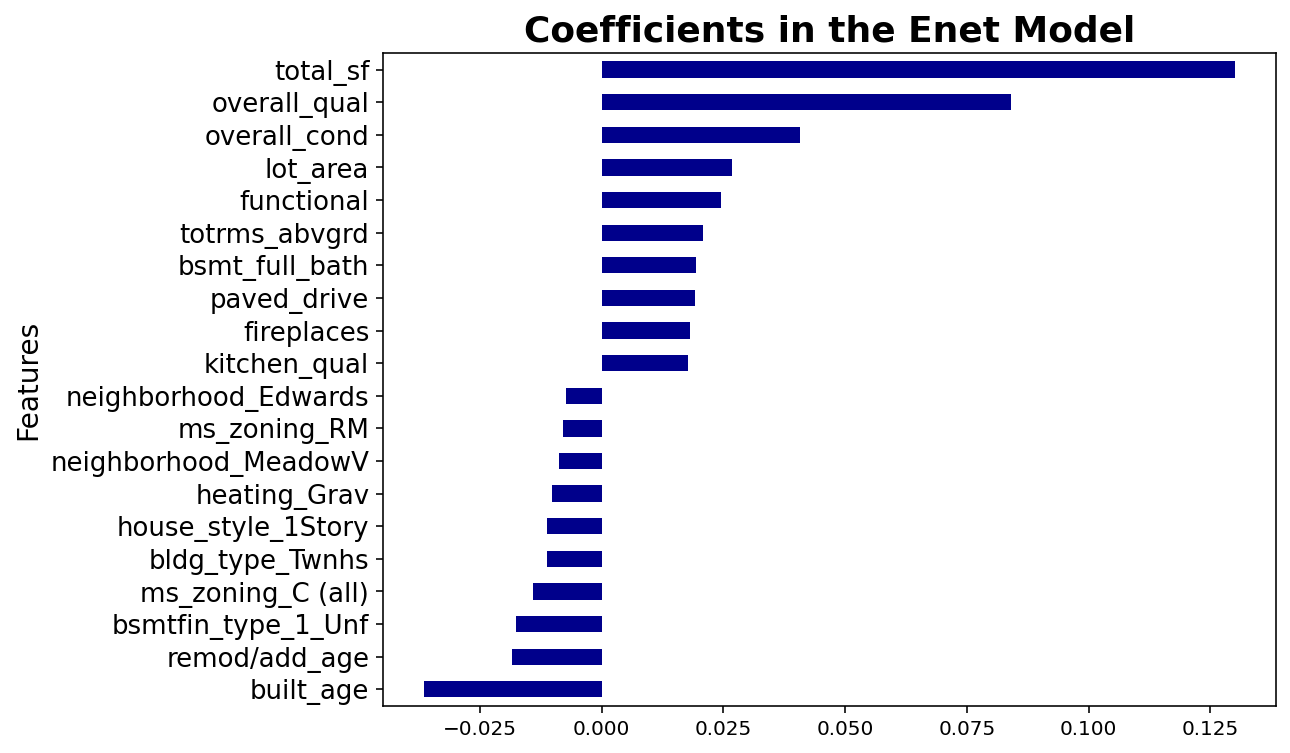

In [39]:
#Plot top coefficients in Elastic Net
plt.figure(figsize = (8,6))
coefs = pd.Series(enet.coef_, index = X_train.columns)
#Include top +ve and -ve coefficients
imp_coefs = pd.concat([coefs.sort_values().head(10), 
                     coefs.sort_values().tail(10)])
#Print Bar chart
imp_coefs.plot(kind = "barh", color = 'darkblue')
plt.ylabel('Features', size = 14)

ax = plt.gca()
ax.tick_params(axis = 'y', labelsize = 13)
plt.title("Coefficients in the Enet Model", size = 18,weight = 'bold')

plt.show()

#### Predict target values

In [40]:
#Predict the price
results_enet=enet.predict(kaggle_test_ss)#Predict the price
results_enet = np.round(np.exp(results_enet),4)#Convert from log scale using exponential
results_enet.mean()

179630.27666268486

#### Linear Regresssion w/ L2 Penalty (Ridge)

In [41]:
ridge.fit(X_train_ss, y_train) #Fit train data
r2_ridge_train=ridge.score(X_train_ss, y_train) #R^2 score on the seen data
print ("R^2 Score on train data: ", r2_ridge_train)
r2_ridge_val=ridge.score(X_test_ss, y_test) #R2 score on the validation data
print ("R^2 Score on validation data: ", r2_ridge_val)
predictions_ridge = ridge.predict(X_test_ss) #Predict saleprice on with test data.
rmse_ridge = (mean_squared_error(y_test, predictions_ridge))**0.5 #Check the RMSE
print ("RMSE Score: ", rmse_ridge)
print("Ridge Alpha",ridge.alpha_)

R^2 Score on train data:  0.9335403769056018
R^2 Score on validation data:  0.9280772585175671
RMSE Score:  0.10982460631301971
Ridge Alpha 10.0


It is noticed that Ridge model being scored lower R^2 during cross validation step, has low R^2 Score on training data (0.933) and validation data (0.92). 


## Inferential Visualizations & Interpretation (above)
The model selected (Lasso and Elastic Net) certainly looks very strong with R2 score of 0.93 on unseen data:
<br>1) There are very few poor predictions, and no real outliers are seen.
<br>2) There is no evidence of overfitting, as the training score is lower than the test score, around 0.92.
<br>3) It is also notable the relative equality of error variance across sale prices. This property of equal error variance is termed homoscedasticity, and it is important here, because homoscedasticity of errors is one of the fundamental assumptions necessary for linear regression to be unbiased.

 ## Kaggle Submissions
 Save the predicted value in the desired format and save the .csv file for upload to kaggle

In [42]:
test=pd.read_csv('datasets/test.csv')
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [43]:
#Merge ID and predicted saleprice using LASSO
submission_lasso = pd.DataFrame(results_lasso, columns=['SalePrice'])
submission_lasso['Id'] = test['Id']
submission_lasso = submission_lasso[['Id', 'SalePrice']]
submission_lasso.head()

,Id,SalePrice
0,2658,139444.8214
1,2718,168250.1271
2,2414,218632.5779
3,1989,104811.0427
4,625,175196.5885


In [44]:
#Merge ID and predicted saleprice using Elastic Net
submission_enet = pd.DataFrame(results_enet, columns=['SalePrice'])
submission_enet['Id'] = test['Id']
submission_enet = submission_enet[['Id', 'SalePrice']]
submission_enet.head()

,Id,SalePrice
0,2658,137945.5305
1,2718,167557.9433
2,2414,219973.2807
3,1989,105049.1567
4,625,175241.8310


In [45]:
# Writing to file that is to be submitted to kaggle-LASSO model
submission_lasso.to_csv('datasets/submission_lasso.csv', index = False)

In [46]:
# writing to file that is to be submitted to kaggle-Elastci Net
submission_enet.to_csv('datasets/submission_enet.csv', index = False)

## Trying out Simple Feature Selection to see Variance in Scores
Manually selecting features with top Lasso generated beta coefficient values and see the variance in $R^2$ scores. 
##### DIsplay the features with high beta coefficients

In [47]:
# to display Lasso generated beta coefficient values to perform feature selection
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,variable,coef,abs_coef
39,total_sf,0.140292,0.140292
3,overall_qual,0.086803,0.086803
4,overall_cond,0.042268,0.042268
40,built_age,-0.041110,0.041110
2,lot_area,0.027008,0.027008
22,functional,0.025190,0.025190
14,bsmt_full_bath,0.019380,0.019380
30,paved_drive,0.018577,0.018577
42,remod/add_age,-0.018442,0.018442
168,bsmtfin_type_1_Unf,-0.017674,0.017674


##### Selecting the Top Features and Checking for the Collienarity
Selecting the top features and checking for the collienarity before fitting into lenear regression model

In [48]:
# selecting the top features and checking for the collienarity before fitting into lenear regression model
features = ['total_sf','overall_qual','overall_cond','built_age','lot_area','functional']
predictor = ['saleprice']
X[features].corr()

,total_sf,overall_qual,overall_cond,built_age,lot_area,functional
total_sf,1.000000,0.670460,-0.161571,-0.409338,0.368502,0.012964
overall_qual,0.670460,1.000000,-0.082006,-0.602471,0.109816,0.181683
overall_cond,-0.161571,-0.082006,1.000000,0.372202,-0.036147,0.129280
built_age,-0.409338,-0.602471,0.372202,1.000000,-0.045348,-0.158290
lot_area,0.368502,0.109816,-0.036147,-0.045348,1.000000,-0.119198
functional,0.012964,0.181683,0.129280,-0.158290,-0.119198,1.000000


In [49]:
#Display only the selected features
train[features].head()

,total_sf,overall_qual,overall_cond,built_age,lot_area,functional
0,2204.0,6,8,34,13517,7
1,3035.0,7,5,13,11492,7
2,2114.0,5,7,57,7922,7
3,1828.0,5,5,4,9802,7
4,2121.0,6,8,110,14235,7


##### Pre-processing-train/test split, scaling

In [50]:
#Pre-processing-train/test_split, scaling
X = train[features]
y = train[predictor]

#train/test split
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size = 0.9 ,random_state = 42)

#scaling
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

##### Cross Validation Score 

In [51]:
# Cross Validation Score of the baseline model
lr_score = cross_val_score(lr, X_train_ss, y_train.saleprice, cv=10)
print('Cross Val Score Linear Regression',lr_score.mean())

# Cross Validation Score of the Lasso model
lasso_score = cross_val_score(lasso, X_train_ss, y_train.saleprice, cv=10)
print('Cross Val Score Lasso',lasso_score.mean())

# Cross Validation Score of the Ridge model
ridge_score = cross_val_score(ridge, X_train_ss, y_train.saleprice, cv=10)
print('Cross Val Score Ridge',ridge_score.mean())

# Cross Validation Score of the Elastic Net model
enet_score = cross_val_score(enet, X_train_ss, y_train.saleprice, cv=10)
print('Cross Val Score Elastic Net',enet_score.mean())

Cross Val Score Linear Regression 0.8722772476365742
Cross Val Score Lasso 0.8722912709775136
Cross Val Score Ridge 0.8722973202016198
Cross Val Score Elastic Net 0.8723584974551362


##### R^2 Score for Base Model, Lasso, Ridge and Elastic Net

In [52]:
#Linear Model
lr.fit(X_train_ss, y_train)
lr_r2_train = lr.score(X_train_ss, y_train)
lr_r2_val = lr.score(X_test_ss, y_test)
print ("R^2 Score on train data: ", lr_r2_train)
print ("R^2 Score on validation data: ", lr_r2_val)

R^2 Score on train data:  0.8730274981878019
R^2 Score on validation data:  0.8868194527616219


In [53]:
#Lasso Model
lasso.fit(X_train_ss, y_train.saleprice)
lasso_r2_train = lasso.score(X_train_ss, y_train.saleprice)
lasso_r2_val = lasso.score(X_test_ss, y_test.saleprice)
print ("R^2 Score on train data: ", lasso_r2_train)
print ("R^2 Score on validation data: ", lasso_r2_val)

R^2 Score on train data:  0.8730231496789833
R^2 Score on validation data:  0.8869846913973818


In [54]:
#Ridge Model
ridge.fit(X_train_ss, y_train.saleprice)
ridge_r2_train = ridge.score(X_train_ss, y_train.saleprice)
ridge_r2_val = ridge.score(X_test_ss, y_test.saleprice)
print ("R^2 Score on train data: ", ridge_r2_train)
print ("R^2 Score on validation data: ", ridge_r2_val)

R^2 Score on train data:  0.873020641899632
R^2 Score on validation data:  0.8871285660725747


In [55]:
#Elastic Net Model
enet.fit(X_train_ss, y_train.saleprice)
enet_r2_train = enet.score(X_train_ss, y_train.saleprice)
enet_r2_val = enet.score(X_test_ss, y_test.saleprice)
print ("R^2 Score on train data: ", enet_r2_train)
print ("R^2 Score on validation data: ", enet_r2_val)

R^2 Score on train data:  0.8730197754890549
R^2 Score on validation data:  0.8870982621847475


The scores for models where manual feature selection was employed returned lower $R^2$ in comparison to non-feature selected models.

## Conclusions and Recommendations
Cleaning and preprocessing the data is extremely tedious work. But It was worth doing since the predictions of the saleprice was observed to be much accurate after that. 

Both Lasso and Elastic Net gave good R^2 score of 0.93% on unseen data. The data was analysed using both the models to predict the price. It should be notable that both the models predicted the sale price very accurately and rather close to each other.

Our models helped us also in feature selection by identifying features that strongly influences sale price both positively and negatively. It was observed that the features identified by both the models are more or less same. Thus we have addressed problem statement by developing a relatively accurate model to predict housing prices based on various features<br>
- Top 3 features that can fetch higher sale price : Bigger houses, Overall material finish of the houses and Overall condition of the houses.<br>
- Features that may hurt the sale price : Age of the house, Age of renovation or additional work, Unfinished basement, Houses located in commercial zone<br>

With top features identifies, it is now more ideal and easy to explain to relevant stakeholders who include house owners and investors.. Ideally we would always want to have a model that is complex enough to fit all the points but still having enough simplicity to explain the model.

This model is a great first step to help our stakeholders to identify opportunities for investment. To be more helpful, the model needs retraining to include Landmrk, and it needs retraining to model price increases with time. Further investigation is needed regarding a small but significant number of very large residuals, which may lead to new insights in modeling.
